In [48]:
path = "Results/Multi-Evaluate-Overview/threshold_similarity_abs-overview.txt"

disregard_params = []

### Read lines and save data

In [49]:
data = {}
with open(path, "r") as f:
    lines = f.readlines()
    for line in lines[2:]:
        dataset = line.split("--")[0].strip()
        param = float(line.split("--")[1].strip().split("_")[-1].strip())
        prompted_percentage = float(line.split("|")[2].strip().split(" ")[-1][1:-2])

        if param in disregard_params:
            continue
        
        if dataset not in data:
            data[dataset] = {}
        if param not in data[dataset]:
            data[dataset][param] = prompted_percentage

for dataset in data:
    data[dataset] = dict(sorted(data[dataset].items()))

### Generate Graphics

In [50]:
data

{'AIDA': {-25.0: 3.17,
  -24.0: 6.82,
  -23.0: 13.78,
  -22.0: 23.37,
  -21.0: 32.87,
  -20.5: 37.21,
  -20.0: 41.94,
  -19.5: 46.13,
  -19.0: 51.01,
  -18.0: 59.38},
 'shadowlinks-shadow': {-25.0: 6.75,
  -24.0: 13.83,
  -23.0: 24.67,
  -22.0: 35.95,
  -21.0: 50.11,
  -20.5: 57.08,
  -20.0: 62.28,
  -19.5: 69.47,
  -19.0: 74.78,
  -18.0: 84.62},
 'shadowlinks-tail': {-25.0: 0.78,
  -24.0: 1.78,
  -23.0: 2.78,
  -22.0: 5.78,
  -21.0: 8.68,
  -20.5: 11.01,
  -20.0: 13.46,
  -19.5: 16.46,
  -19.0: 19.69,
  -18.0: 28.25},
 'tweeki': {-25.0: 10.51,
  -24.0: 16.36,
  -23.0: 22.31,
  -22.0: 29.91,
  -21.0: 38.43,
  -20.5: 42.41,
  -20.0: 46.96,
  -19.5: 51.17,
  -19.0: 55.26,
  -18.0: 65.3},
 'reddit-comments': {-25.0: 6.12,
  -24.0: 14.44,
  -23.0: 22.76,
  -22.0: 32.5,
  -21.0: 43.17,
  -20.5: 48.67,
  -20.0: 54.0,
  -19.5: 58.87,
  -19.0: 64.36,
  -18.0: 74.41}}

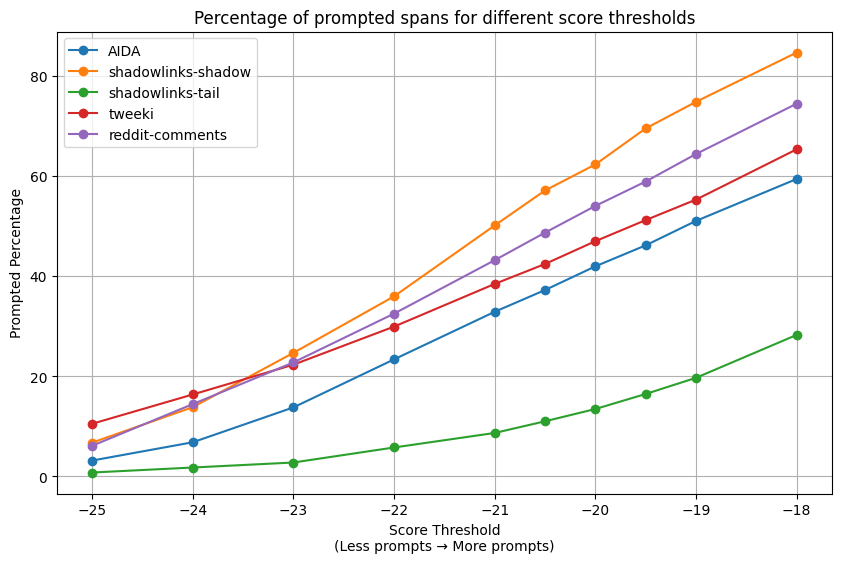

In [55]:
import matplotlib.pyplot as plt
import numpy as np

overall_avg_dict = {}
for dataset, param_dict in data.items():
    for param, prompted_percentage in param_dict.items():
        if param not in overall_avg_dict:
            overall_avg_dict[param] = []
        overall_avg_dict[param].append(prompted_percentage)

plt.figure(figsize=(10, 6))
for dataset, param_dict in data.items():
    params = sorted(param_dict.keys())
    percentages = [param_dict[p] for p in params]
    plt.plot(params, percentages, marker='o', label=dataset)
plt.xlabel("Score Threshold\n(Less prompts → More prompts)")
plt.ylabel("Prompted Percentage")
plt.title("Percentage of prompted spans for different score thresholds")
plt.legend()
plt.grid()
plt.show()

In [52]:
data

{'AIDA': {-25.0: 3.17,
  -24.0: 6.82,
  -23.0: 13.78,
  -22.0: 23.37,
  -21.0: 32.87,
  -20.5: 37.21,
  -20.0: 41.94,
  -19.5: 46.13,
  -19.0: 51.01,
  -18.0: 59.38},
 'shadowlinks-shadow': {-25.0: 6.75,
  -24.0: 13.83,
  -23.0: 24.67,
  -22.0: 35.95,
  -21.0: 50.11,
  -20.5: 57.08,
  -20.0: 62.28,
  -19.5: 69.47,
  -19.0: 74.78,
  -18.0: 84.62},
 'shadowlinks-tail': {-25.0: 0.78,
  -24.0: 1.78,
  -23.0: 2.78,
  -22.0: 5.78,
  -21.0: 8.68,
  -20.5: 11.01,
  -20.0: 13.46,
  -19.5: 16.46,
  -19.0: 19.69,
  -18.0: 28.25},
 'tweeki': {-25.0: 10.51,
  -24.0: 16.36,
  -23.0: 22.31,
  -22.0: 29.91,
  -21.0: 38.43,
  -20.5: 42.41,
  -20.0: 46.96,
  -19.5: 51.17,
  -19.0: 55.26,
  -18.0: 65.3},
 'reddit-comments': {-25.0: 6.12,
  -24.0: 14.44,
  -23.0: 22.76,
  -22.0: 32.5,
  -21.0: 43.17,
  -20.5: 48.67,
  -20.0: 54.0,
  -19.5: 58.87,
  -19.0: 64.36,
  -18.0: 74.41}}

In [53]:
for param, percentages in overall_avg_dict.items():
    overall_avg_dict[param] = round(np.mean(percentages), 2)

overall_avg_dict

{-25.0: 5.47,
 -24.0: 10.65,
 -23.0: 17.26,
 -22.0: 25.5,
 -21.0: 34.65,
 -20.5: 39.28,
 -20.0: 43.73,
 -19.5: 48.42,
 -19.0: 53.02,
 -18.0: 62.39}